In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,AvgPool2D,BatchNormalization
from keras.utils import np_utils
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten

Using TensorFlow backend.


In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
a = pd.read_csv("emnist-balanced-train.csv")

In [4]:
a.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
a.values[:,0]

array([36, 43, 15, ..., 23, 31,  8], dtype=int64)

In [9]:
len(a['23'].unique())

255

In [10]:
imgs = np.transpose(a.values[:,1:].reshape(len(a), 28, 28, 1), axes=[0,2,1,3])

In [11]:
imgs = imgs/ 255

In [12]:
labels = np_utils.to_categorical(a.values[:,0], 47)

In [13]:
b = pd.read_csv("emnist-balanced-test.csv")

In [15]:
imgst = np.transpose(b.values[:,1:].reshape(len(b), 28, 28, 1), axes=[0,2,1,3])

In [16]:
imgst = imgst/ 255

In [17]:
b.head()

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
labelst = np_utils.to_categorical(b.values[:,0], 47)

In [19]:
imgs.shape

(112799, 28, 28, 1)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=imgs.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(512, activation="relu"))
model.add(Dense(47, activation="softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [22]:
model.fit(imgs,labels,batch_size=32,epochs=5,verbose=1,validation_data=(imgst, labelst))


Train on 112799 samples, validate on 18799 samples
Epoch 1/5
112799/112799 [==============================] - 34s 297us/step - loss: 0.7345 - accuracy: 0.7620 - val_loss: 0.4102 - val_accuracy: 0.8563
Epoch 2/5
112799/112799 [==============================] - 29s 261us/step - loss: 0.4532 - accuracy: 0.8425 - val_loss: 0.3951 - val_accuracy: 0.8601
Epoch 3/5
112799/112799 [==============================] - 29s 258us/step - loss: 0.4022 - accuracy: 0.8577 - val_loss: 0.3711 - val_accuracy: 0.8716
Epoch 4/5
112799/112799 [==============================] - 29s 255us/step - loss: 0.3722 - accuracy: 0.8663 - val_loss: 0.3517 - val_accuracy: 0.8746
Epoch 5/5
112799/112799 [==============================] - 29s 254us/step - loss: 0.3530 - accuracy: 0.8716 - val_loss: 0.3536 - val_accuracy: 0.8746


In [24]:
model.save("model.h5")

In [28]:
model_ = model.to_json()
with open("model.json", "w") as model__:
    model__.write(model_)
model.save_weights("model_weights.h5")

In [2]:
model = load_model("model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [2]:
import cv2

___

# Reading img in gray scale

In [7]:
a = cv2.imread("jimg.jpeg",0)

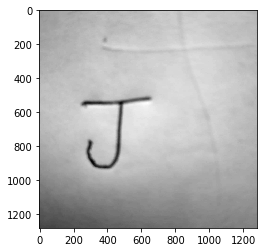

In [8]:
plt.imshow(a,cmap="gray")

___

# GaussianBlur

In [9]:
im_gray = cv2.GaussianBlur(a, (5,5), 0)

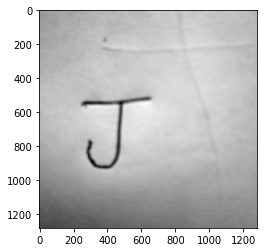

In [10]:
plt.imshow(im_gray,cmap="gray")

___

# Thresholding

In [11]:
ret, thre = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY_INV)

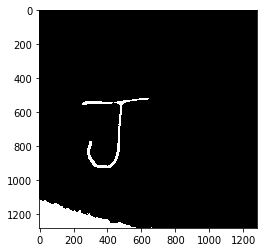

In [12]:
plt.imshow(thre,cmap="gray")

___

# R.O.I extraction and resizeing

In [18]:
ctrs,_= cv2.findContours(thre.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [20]:
c = cv2.resize(thre.copy(),(28,28))

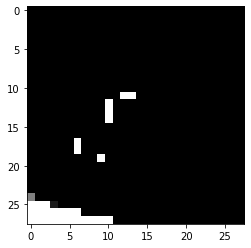

In [21]:
plt.imshow(c, cmap = "gray")

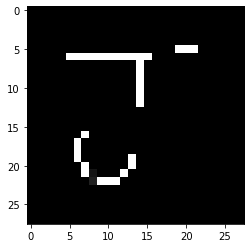

In [23]:
for rect in rects:
    cv2.rectangle(a, (rect[0], rect[1]), (rect[0] + rect[2], rect[1]     + rect[3]), (0, 255, 0), 3) 
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = thre[pt1:pt1+leng, pt2:pt2+leng]
    if roi.any():
        roi = cv2.dilate(roi, (2, 2))
        roi = cv2.resize(roi, (28,28))
    plt.imshow(roi,cmap="gray")
    